<a href="https://colab.research.google.com/github/ik-okoro/DS-Unit-4-Sprint-1-NLP/blob/main/module1-text-data/LS_DS_411_Text_Data_Assignment.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP)
## *Data Science Unit 4 Sprint 1 Assignment 1*

Your goal in this assignment: find the attributes of the best & worst coffee shops in the dataset. The text is fairly raw: dates in the review, extra words in the `star_rating` column, etc. You'll probably want to clean that stuff up for a better analysis. 

Analyze the corpus of text using text visualizations of token frequency. Try cleaning the data as much as possible. Try the following techniques: 
- Lemmatization
- Custom stopword removal

Keep in mind the attributes of good tokens. Once you have a solid baseline, layer in the star rating in your visualization(s). Key part of this assignment - produce a write-up of the attributes of the best and worst coffee shops. Based on your analysis, what makes the best the best and the worst the worst. Use graphs and numbesr from your analysis to support your conclusions. There should be plenty of markdown cells! :coffee:

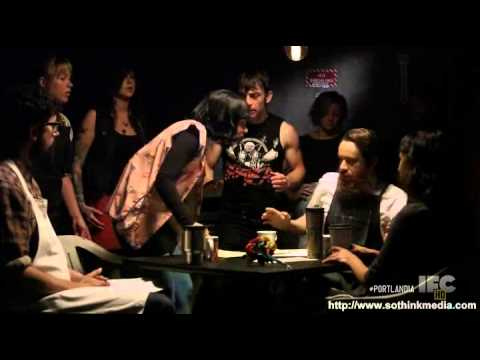

In [ ]:
from IPython.display import YouTubeVideo

YouTubeVideo('Jml7NVYm8cs')

In [ ]:
%pwd

'/Users/jonathansokoll/Documents/lambda/DS-Unit-4-Sprint-1-NLP/module1-text-data'

In [ ]:
import pandas as pd
import re
import matplotlib.pyplot as plt
import seaborn as sns
!pip install squarify
import squarify
from collections import Counter
import spacy

In [ ]:
!python -m spacy download en_core_web_lg

✔ Download and installation successful
You can now load the model via spacy.load('en_core_web_lg')


In [ ]:
nlp = spacy.load("en_core_web_lg")

In [ ]:
url = "https://raw.githubusercontent.com/LambdaSchool/DS-Unit-4-Sprint-1-NLP/main/module1-text-data/data/yelp_coffeeshop_review_data.csv"

shops = pd.read_csv(url)
print(shops.shape)
shops.head()

(7616, 3)


,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,11/25/2016 1 check-in Love love loved the atm...,5.0 star rating
1,The Factory - Cafe With a Soul,"12/2/2016 Listed in Date Night: Austin, Ambia...",4.0 star rating
2,The Factory - Cafe With a Soul,11/30/2016 1 check-in Listed in Brunch Spots ...,4.0 star rating
3,The Factory - Cafe With a Soul,11/25/2016 Very cool decor! Good drinks Nice ...,2.0 star rating
4,The Factory - Cafe With a Soul,12/3/2016 1 check-in They are located within ...,4.0 star rating


In [ ]:
# Clean full review text
shops["full_review_text"] = shops["full_review_text"].apply(lambda x: " ".join(x.split()[1:]))
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5.0 star rating
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4.0 star rating
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4.0 star rating
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2.0 star rating
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4.0 star rating


In [ ]:
shops["star_rating"].value_counts()

 5.0 star rating     3780
 4.0 star rating     2360
 3.0 star rating      738
 2.0 star rating      460
 1.0 star rating      278
Name: star_rating, dtype: int64

In [ ]:
# Change star rating to int
shops["star_rating"] = shops["star_rating"].apply(lambda x: int(float(x.split()[0])))
shops.head()

,coffee_shop_name,full_review_text,star_rating
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4


## How do we want to analyze these coffee shop tokens? 

- Overall Word / Token Count
- View Counts by Rating 
- *Hint:* a 'bad' coffee shops has a rating betweeen 1 & 3 based on the distribution of ratings. A 'good' coffee shop is a 4 or 5. 

In [ ]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [ ]:
tokens = []

""" Update those tokens w/o stopwords"""
for doc in nlp.pipe(shops["full_review_text"], batch_size=500):
    
    doc_tokens = []
    
    for token in doc:
      # filter out bad tokens
        if (token.is_stop == False) & (token.is_punct == False):
            doc_tokens.append(token.lemma_.lower())

    tokens.append(doc_tokens)

shops['tokens'] = tokens
shops.head()

,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,"[1, check, love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,"[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,"[1, check, list, brunch, spots, love, eclectic..."
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,"[cool, decor, good, drink, nice, seating, over..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,"[1, check, locate, northcross, mall, shopping,..."


In [ ]:
wc = count(shops["tokens"])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,coffee,4953,10762,1.0,0.029739,0.029739,0.650341
110,place,3886,6047,2.0,0.016710,0.046449,0.510242
158,good,3578,5363,3.0,0.014820,0.061268,0.469800
129,great,2859,3959,4.0,0.010940,0.072208,0.375394
13,check,3174,3468,5.0,0.009583,0.081791,0.416754


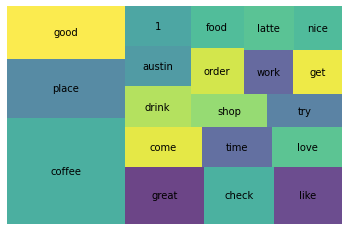

In [ ]:
# View totals for top 20, both good and bad
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Can visualize the words with the greatest difference in counts between 'good' & 'bad'?

Couple Notes: 
- Rel. freq. instead of absolute counts b/c of different numbers of reviews
- Only look at the top 5-10 words with the greatest differences


In [ ]:
# Make tables for good and bad
good_shops = shops[shops["star_rating"] >= 4]
bad_shops = shops[shops["star_rating"] < 4]
print(good_shops.shape)
good_shops.head()

(6140, 4)


,coffee_shop_name,full_review_text,star_rating,tokens
0,The Factory - Cafe With a Soul,1 check-in Love love loved the atmosphere! Eve...,5,"[1, check, love, love, love, atmosphere, corne..."
1,The Factory - Cafe With a Soul,"Listed in Date Night: Austin, Ambiance in Aust...",4,"[list, date, night, austin, ambiance, austin, ..."
2,The Factory - Cafe With a Soul,1 check-in Listed in Brunch Spots I loved the ...,4,"[1, check, list, brunch, spots, love, eclectic..."
4,The Factory - Cafe With a Soul,1 check-in They are located within the Northcr...,4,"[1, check, locate, northcross, mall, shopping,..."
5,The Factory - Cafe With a Soul,1 check-in Very cute cafe! I think from the mo...,4,"[1, check, cute, cafe, think, moment, step, fi..."


In [ ]:
print(bad_shops.shape)
bad_shops.head()

(1476, 4)


,coffee_shop_name,full_review_text,star_rating,tokens
3,The Factory - Cafe With a Soul,Very cool decor! Good drinks Nice seating Howe...,2,"[cool, decor, good, drink, nice, seating, over..."
8,The Factory - Cafe With a Soul,"1 check-in Ok, let's try this approach... Pros...",3,"[1, check, ok, let, try, approach, pro, music,..."
11,The Factory - Cafe With a Soul,"The store has A+ decoration, but honestly, the...",3,"[store, a+, decoration, honestly, coffee, good..."
12,The Factory - Cafe With a Soul,1 check-in Listed in 2016 - The Third Time is ...,3,"[1, check, list, 2016, time, charm, factory, a..."
25,The Factory - Cafe With a Soul,"Okay, so after visiting my friends in LA and t...",1,"[okay, visit, friend, la, try, mint, mojito, i..."


In [ ]:
def tokenize(df):
  tokens = []

  """ Update those tokens w/o stopwords"""
  for doc in nlp.pipe(df["full_review_text"], batch_size=500):
      
      doc_tokens = []
      
      for token in doc:
        # filter out bad tokens
          if (token.is_stop == False) & (token.is_punct == False):
              doc_tokens.append(token.lemma_.lower())

      tokens.append(doc_tokens)

  df['tokens'] = tokens

In [ ]:
tokenize(good_shops)
tokenize(bad_shops)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:16: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  app.launch_new_instance()


In [ ]:
wc_good = count(good_shops["tokens"])
wc_bad = count(bad_shops["tokens"])

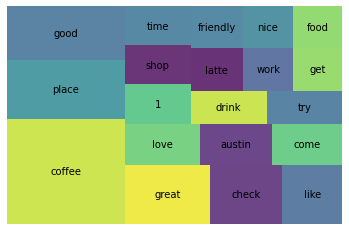

In [ ]:
# View square plot for good plots

wc_top20 = wc_good[wc_good['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

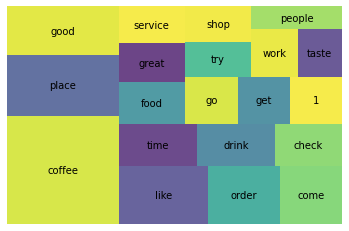

In [ ]:
# View square plot for good plots

wc_top20 = wc_bad[wc_bad['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stretch Goals

* Analyze another corpus of documents - such as Indeed.com job listings ;).
* Play with the Spacy API to
 - Extract Named Entities
 - Extracting 'noun chunks'
 - Attempt Document Classification with just Spacy
 - *Note:* This [course](https://course.spacy.io/) will be of interesting in helping you with these stretch goals. 
* Try to build a plotly dash app with your text data 

